# Exploratory Data Analysis + Regression Model
### Data: NHANES DATA FOR DEXA SCAN AND EXERCISE
>Data are from NHANES 2007-2008 for subjects 40 years or older who were given a Duel-Energy X-ray Absorptiometry (DEXA) scan and for whom we have exercise information. Although NHANES uses a complex, multistage probability sampling design, the data were analyzed as though they were from a simple random sample.

## NHANES
##### The National Health and Nutrition Examination Survey (NHANES) is a program of studies designed to assess the health and nutritional status of adults and children in the United States. The program began in the 1960s and has been conducted as a series of surveys focusing on different population groups or health topics. The survey is unique in that it combines interviews and physical examinations, and examines a nationally representative sample of about 5,000 persons each year. These persons are located in counties across the country, 15 of which are visited each year. The NHANES interview includes demographic, socioeconomic, dietary, and health-related questions. The examination component consists of medical, dental, and physiological measurements, as well as laboratory tests administered by highly trained medical personnel.

### Research Question of Interest and Data Collection Method
##### The interest of this analysis is to understand the effect of exercise on bone mineral density among people age 40 years and above in the United States. Data for this analysis was collected from NHANES 2007-2008 for subjects 40 years and above who were given a Dual-Energy X-ray Absorptiometry (DEXA) scan and for whom who have exercise information.

## *Import all libraries needed for analysis*

In [291]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import copy
import plotly.express as px
%matplotlib inline

In [292]:
#import sas dataset to python
df = pd.read_sas("bmd.sas7bdat")
df.head()

,SEQN,RIAGENDR,RIDAGEMN,RIDRETH1,BMXBMI,smoker,totmet,metcat,DXXOFBMD,tbmdcat,calcium,vitd,DSQTVD,DSQTCALC
0,41475.0,2.0,751.0,5.0,58.04,3.0,0.0,0.0,NaN,NaN,673.5,2.20,5.0,700.0
1,41477.0,1.0,859.0,3.0,30.05,2.0,0.0,0.0,1.001,0.0,397.5,5.25,0.0,0.0
2,41479.0,1.0,629.0,1.0,27.56,3.0,6000.0,2.0,0.907,0.0,720.0,3.20,2.3,49.0
3,41482.0,1.0,778.0,1.0,33.64,2.0,360.0,0.0,0.972,0.0,816.0,2.85,0.0,300.0
4,41483.0,1.0,803.0,4.0,44.06,3.0,0.0,0.0,1.243,0.0,830.5,3.50,0.0,0.0


In [293]:
#get shape of data
nr, nc = df.shape
print(f"We have a total of {nr} rows and {nc} columns")

We have a total of 3586 rows and 14 columns


In [294]:
#Get info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      3586 non-null   float64
 1   RIAGENDR  3586 non-null   float64
 2   RIDAGEMN  3586 non-null   float64
 3   RIDRETH1  3586 non-null   float64
 4   BMXBMI    3410 non-null   float64
 5   smoker    3586 non-null   float64
 6   totmet    3571 non-null   float64
 7   metcat    3586 non-null   float64
 8   DXXOFBMD  2930 non-null   float64
 9   tbmdcat   2930 non-null   float64
 10  calcium   3311 non-null   float64
 11  vitd      3311 non-null   float64
 12  DSQTVD    3584 non-null   float64
 13  DSQTCALC  3584 non-null   float64
dtypes: float64(14)
memory usage: 392.3 KB


#### *From the output we see that we have a total of 3586 rows and 14 columns. Also, all varibles are quantitative and data type is classified as float. However, from the datamap, some variables are categorical and have been coded as numeric for which labels are to be created for. Will need to convert some variables back to object for purposed of EDA. Some columns also has some missing values and will need to be adjusted.*

In [295]:
#first rename variables to more understandable names.
rename_dict = {
    "SEQN": "Id",
    "RIAGENDR": "Sex",
    "RIDAGEMN": "Age(months)",
    "RIDRETH1": "Ethnicity",
    "BMXBMI": "BMI",
    "DXXOFBMD": "Bone_m_density",
    "vitd": "Vitamin D(dietary)",
    "DSQTCALC": "Calcium (supplement)",
    "DSQTVD": "Vitamin D(supplement)",
    "calcium": "Calcium(dietary)",
    "tbmdcat": "BMD(categorized)",
    "metcat": "PA Level (categorized)",
    "totmet": "Total measure of PA"
}
df.rename(columns=rename_dict, inplace=True)
df.head()



,Id,Sex,Age(months),Ethnicity,BMI,smoker,Total measure of PA,PA Level (categorized),Bone_m_density,BMD(categorized),Calcium(dietary),Vitamin D(dietary),Vitamin D(supplement),Calcium (supplement)
0,41475.0,2.0,751.0,5.0,58.04,3.0,0.0,0.0,NaN,NaN,673.5,2.20,5.0,700.0
1,41477.0,1.0,859.0,3.0,30.05,2.0,0.0,0.0,1.001,0.0,397.5,5.25,0.0,0.0
2,41479.0,1.0,629.0,1.0,27.56,3.0,6000.0,2.0,0.907,0.0,720.0,3.20,2.3,49.0
3,41482.0,1.0,778.0,1.0,33.64,2.0,360.0,0.0,0.972,0.0,816.0,2.85,0.0,300.0
4,41483.0,1.0,803.0,4.0,44.06,3.0,0.0,0.0,1.243,0.0,830.5,3.50,0.0,0.0


In [296]:
#Convert categorical variables back to object dtype. variables needing conversion: sex, ethnicity, smoker, pa level, bmd categorized
df["Sex"].value_counts()
df["Ethnicity"].value_counts()
df["smoker"].value_counts()
df["PA Level (categorized)"].value_counts()
df["BMD(categorized)"].value_counts()
df["Sex"] = df["Sex"].map({1:"Male", 2:"Female"})
df["Ethnicity"] = df["Ethnicity"].map({1:"Mex american", 2:"Other hispanic", 3:"Euro-American", 4:"Afro-American", 5:"Other"})
df["PA Level (categorized)"] = df["PA Level (categorized)"].map({0:"low", 1:"moderate", 2:"high"})
df["BMD(categorized)"] = df["BMD(categorized)"].map({0:"Normal", 1:"Ostepeonia", 2:"Osteoporosis"})
df["smoker"] = df["smoker"].map({1:"current smoker", 2:"Past smoker", 3:"Never smoked", 9:"NaN"})

df

,Id,Sex,Age(months),Ethnicity,BMI,smoker,Total measure of PA,PA Level (categorized),Bone_m_density,BMD(categorized),Calcium(dietary),Vitamin D(dietary),Vitamin D(supplement),Calcium (supplement)
0,41475.0,Female,751.0,Other,58.04,Never smoked,0.0,low,NaN,NaN,673.5,2.20,5.0,700.0
1,41477.0,Male,859.0,Euro-American,30.05,Past smoker,0.0,low,1.001,Normal,397.5,5.25,0.0,0.0
2,41479.0,Male,629.0,Mex american,27.56,Never smoked,6000.0,high,0.907,Normal,720.0,3.20,2.3,49.0
3,41482.0,Male,778.0,Mex american,33.64,Past smoker,360.0,low,0.972,Normal,816.0,2.85,0.0,300.0
4,41483.0,Male,803.0,Afro-American,44.06,Never smoked,0.0,low,1.243,Normal,830.5,3.50,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3581,51618.0,Male,587.0,Euro-American,29.96,Never smoked,0.0,low,1.095,Normal,450.5,1.25,2.1,13.3
3582,51619.0,Male,739.0,Mex american,30.08,current smoker,14400.0,high,0.915,Normal,1164.0,4.50,10.0,210.0
3583,51620.0,Female,611.0,Euro-American,28.31,Past smoker,26160.0,high,0.951,Normal,661.0,2.50,0.0,0.0
3584,51622.0,Female,727.0,Afro-American,31.53,Never smoked,0.0,low,0.928,Normal,1475.0,9.00,0.0,0.0


## Data Cleaning ##
### *For our analysis we are only interested in subjects who are 40 years and older, had a DEXA scan and for whom we have exercise information. we are going to subset our dataset to reflect the sample of interest* ###

In [297]:
#subset data to only contain persons age 40 years and above with no missing info on exercise info.
df = df[(df["Age(months)"] >= 480) & (df["Total measure of PA"] > 0) & (df["Total measure of PA"].notna()) & df["Bone_m_density"].notna()]
df.info()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 2023 entries, 2 to 3583
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      2023 non-null   float64
 1   Sex                     2023 non-null   object 
 2   Age(months)             2023 non-null   float64
 3   Ethnicity               2023 non-null   object 
 4   BMI                     2017 non-null   float64
 5   smoker                  2023 non-null   object 
 6   Total measure of PA     2023 non-null   float64
 7   PA Level (categorized)  2023 non-null   object 
 8   Bone_m_density          2023 non-null   float64
 9   BMD(categorized)        2023 non-null   object 
 10  Calcium(dietary)        1982 non-null   float64
 11  Vitamin D(dietary)      1982 non-null   float64
 12  Vitamin D(supplement)   2023 non-null   float64
 13  Calcium (supplement)    2023 non-null   float64
dtypes: float64(9), object(5)
memory usage: 2

In [298]:
#check if there are missing values
df.isnull().sum()

Id                         0
Sex                        0
Age(months)                0
Ethnicity                  0
BMI                        6
smoker                     0
Total measure of PA        0
PA Level (categorized)     0
Bone_m_density             0
BMD(categorized)           0
Calcium(dietary)          41
Vitamin D(dietary)        41
Vitamin D(supplement)      0
Calcium (supplement)       0
dtype: int64

## *Since the number of null values for BMI, Calcium and Vitamin D is less than 10%, they are less likely to affect the outcome and so we can drop them from the dataset.*

In [299]:
df = df.dropna()
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1979 entries, 2 to 3583
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      1979 non-null   float64
 1   Sex                     1979 non-null   object 
 2   Age(months)             1979 non-null   float64
 3   Ethnicity               1979 non-null   object 
 4   BMI                     1979 non-null   float64
 5   smoker                  1979 non-null   object 
 6   Total measure of PA     1979 non-null   float64
 7   PA Level (categorized)  1979 non-null   object 
 8   Bone_m_density          1979 non-null   float64
 9   BMD(categorized)        1979 non-null   object 
 10  Calcium(dietary)        1979 non-null   float64
 11  Vitamin D(dietary)      1979 non-null   float64
 12  Vitamin D(supplement)   1979 non-null   float64
 13  Calcium (supplement)    1979 non-null   float64
dtypes: float64(9), object(5)
memory usage: 2

In [300]:
#Examine each variable for accurate and consistent data.
# Check if there are duplicates
df.duplicated().sum()


0

In [301]:
#create new columns to represent total calcium and total vitamin D
df["Total Calcium "] = df["Calcium(dietary)"] + df["Calcium (supplement)"]
df["Total VitaminD"] = df["Vitamin D(dietary)"] + df["Vitamin D(supplement)"]

#drop previous vitamin D and calcium variables
df.drop(columns=["Calcium(dietary)", "Calcium (supplement)", "Vitamin D(dietary)", "Vitamin D(supplement)"], inplace=True)
df.head()

,Id,Sex,Age(months),Ethnicity,BMI,smoker,Total measure of PA,PA Level (categorized),Bone_m_density,BMD(categorized),Total Calcium,Total VitaminD
2,41479.0,Male,629.0,Mex american,27.56,Never smoked,6000.0,high,0.907,Normal,769.0,5.50
3,41482.0,Male,778.0,Mex american,33.64,Past smoker,360.0,low,0.972,Normal,1116.0,2.85
8,41492.0,Male,866.0,Euro-American,29.02,Never smoked,600.0,moderate,0.946,Normal,1256.0,14.90
9,41493.0,Female,934.0,Euro-American,19.96,current smoker,280.0,low,0.884,Normal,1049.0,3.85
10,41494.0,Male,480.0,Mex american,25.46,current smoker,24480.0,high,1.062,Normal,849.0,4.10


## *Univariate Analysis*

In [302]:
sns.set_theme(style="darkgrid")

In [303]:
def desc_cont(column):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

    # assigning a graph to each ax
    sns.boxplot(df[column], ax=ax_box)
    sns.histplot(data=df, x=column, kde=True, ax=ax_hist)

    # Remove x axis name for the boxplot
    ax_box.set(xlabel='')
    plt.show()

C:\Users\faree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


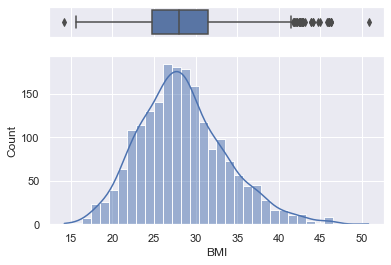

count    1979.000000
mean       28.455548
std         5.277900
min        14.200000
25%        24.785000
50%        28.040000
75%        31.550000
max        50.820000
Name: BMI, dtype: float64

In [304]:
#BMI
desc_cont("BMI")
df["BMI"].describe()

## *From looking at our plot as well as looking at the mean and median, we see that our variable has a normal curve. The mean BMI was 28.46 showing that on average most people were overweight. The boxplot also has some outliers which we will need to remember when creating our model.*

C:\Users\faree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


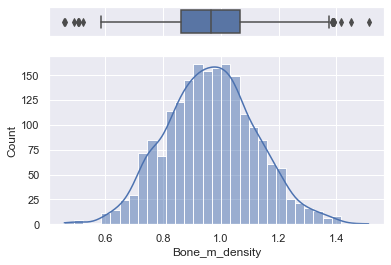

count    1979.000000
mean        0.965838
std         0.155091
min         0.458000
25%         0.861000
50%         0.966000
75%         1.067000
max         1.512000
Name: Bone_m_density, dtype: float64

In [305]:
#Bone mineral density
desc_cont("Bone_m_density")
df["Bone_m_density"].describe()

## *The mean bone mineral density was 0.97. The standard deviation was 0.16. There seem to be outliers in the upper and lower region of the data. Again this will be important to remember when doing our model. *

C:\Users\faree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


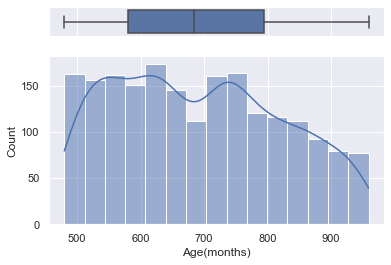

count    1979.000000
mean      691.663466
std       131.108832
min       480.000000
25%       580.000000
50%       684.000000
75%       794.000000
max       959.000000
Name: Age(months), dtype: float64

In [306]:
desc_cont("Age(months)")
df["Age(months)"].describe()

## *The median age was 692 (58 years old). The Interquartile range was 214.0(18 years old). The data was a bit skewed towards the right and there weren't any outliers reported by the boxplot.*

C:\Users\faree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


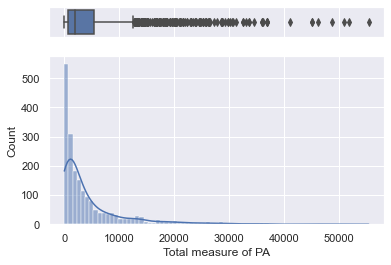

count     1979.000000
mean      4674.429510
std       6720.641901
min         40.000000
25%        720.000000
50%       1960.000000
75%       5500.000000
max      55440.000000
Name: Total measure of PA, dtype: float64

In [307]:
#Physical Activity
desc_cont("Total measure of PA")
df["Total measure of PA"].describe()

## *From the plot above, we can see that the measure of physical activity is highly skewed. we will need to tranform this data using a logarithmic transformation in order to make accurate predictions and to make gradient descent easy to converge*

C:\Users\faree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


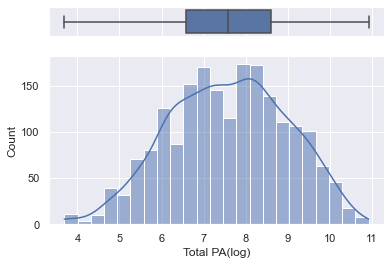

count    1979.000000
mean        7.588330
std         1.401149
min         3.688879
25%         6.579251
50%         7.580700
75%         8.612497
max        10.923057
Name: Total PA(log), dtype: float64

In [308]:
df["Total PA(log)"] = np.log(df["Total measure of PA"])
desc_cont("Total PA(log)")
df["Total PA(log)"].describe()

## *By tranforming our data, we have made it look more normal. we can see that the mean and median are very close. Also, the mean total PA level was 7.59 and the standard deviation was 1.40*

C:\Users\faree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


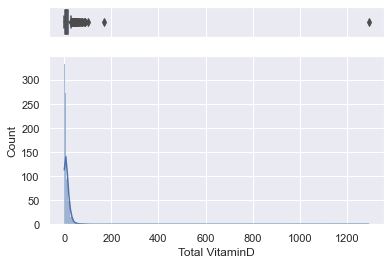

count    1979.000000
mean       10.496716
std        30.936334
min         0.000000
25%         2.700000
50%         5.950000
75%        13.775000
max      1292.650000
Name: Total VitaminD, dtype: float64

In [309]:
#vitamin D
desc_cont("Total VitaminD")
df["Total VitaminD"].describe()

## *Similar to bone mineral density, the plot above shows that total vitamin d is highly skewed and will also need to be transformed using a natural logarithm to create normality in the data.*

C:\Users\faree\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\faree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


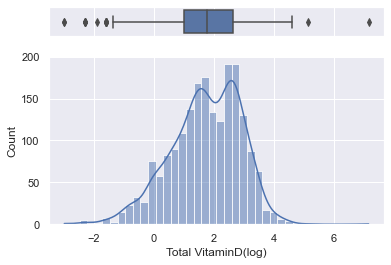

count    1979.000000
mean        1.725869
std         1.175241
min        -2.995732
25%         0.993252
50%         1.783391
75%         2.622854
max         7.164450
Name: Total VitaminD(log), dtype: float64

In [310]:
df["Total VitaminD(log)"] = np.where(df["Total VitaminD"]>0, np.log(df["Total VitaminD"]), 0)
desc_cont("Total VitaminD(log)")
df["Total VitaminD(log)"].describe()

## *After log transforming the data, the data looks close to normal. The mean for total vitamin D is 1.73 and the interquartile range was 1.63.*

C:\Users\faree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


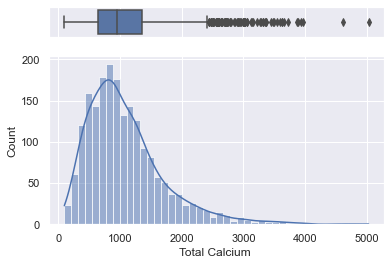

count    1979.000000
mean     1083.778322
std       631.043229
min        97.000000
25%       645.750000
50%       948.500000
75%      1357.150000
max      5032.500000
Name: Total Calcium , dtype: float64

In [311]:
#Calcium
desc_cont("Total Calcium ")
df["Total Calcium "].describe()

## *Our variable is clearly skewed to the right and will also need to be transformed to achieve normality*

C:\Users\faree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


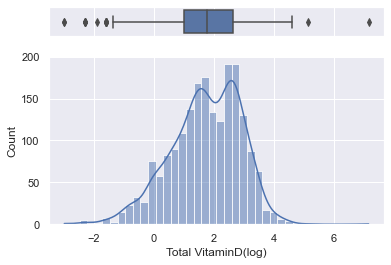

count    1979.000000
mean        6.826155
std         0.586929
min         4.574711
25%         6.470412
50%         6.854882
75%         7.213141
max         8.523672
Name: Total Calcium(log), dtype: float64

In [312]:
df["Total Calcium(log)"] = np.log(df["Total Calcium "])
desc_cont("Total VitaminD(log)")
df["Total Calcium(log)"].describe()

## *After transformation, our variable looks close to normal. The mean for total calium was 6.83 and the standard deviation was 0.57*

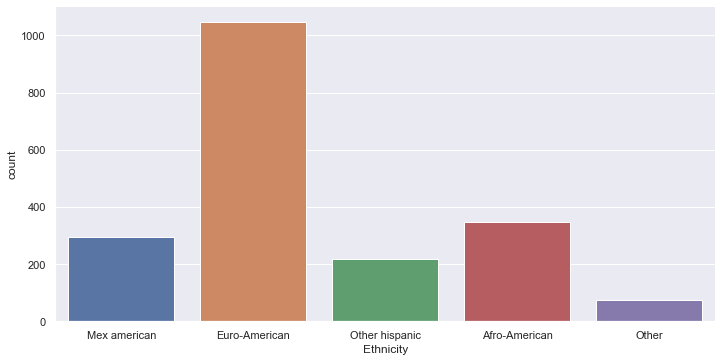

In [313]:
#Ethnicity
sns.catplot(data=df, x="Ethnicity", kind="count", height=5, aspect=2)

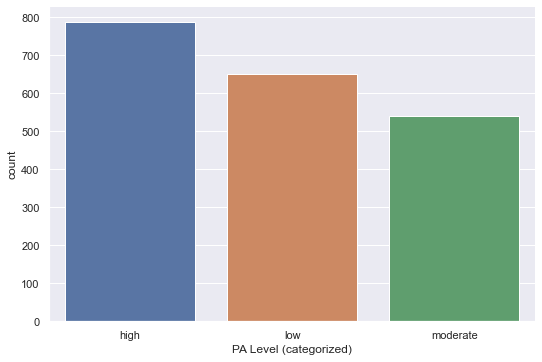

In [314]:
#Categorized PA levels
sns.catplot(data=df, x="PA Level (categorized)", kind="count", height=5, aspect=1.5)

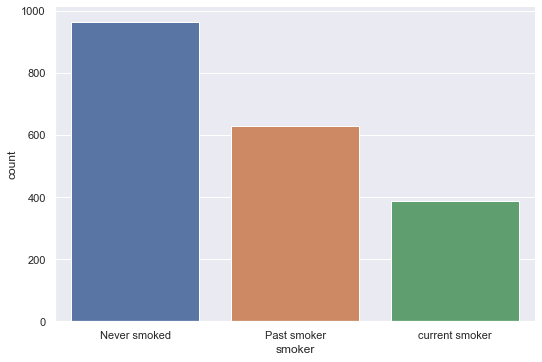

In [315]:
#Smoker
sns.catplot(data=df, x="smoker", kind="count", height=5, aspect=1.5)

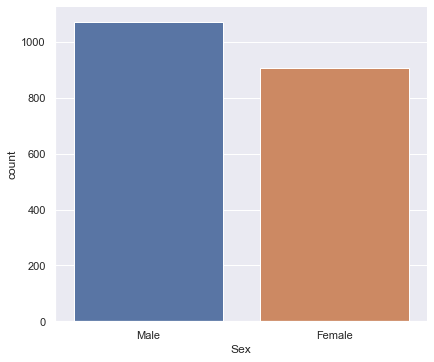

In [316]:
#Sex
sns.catplot(data=df, x="Sex", kind="count", height=5, aspect=1.2)

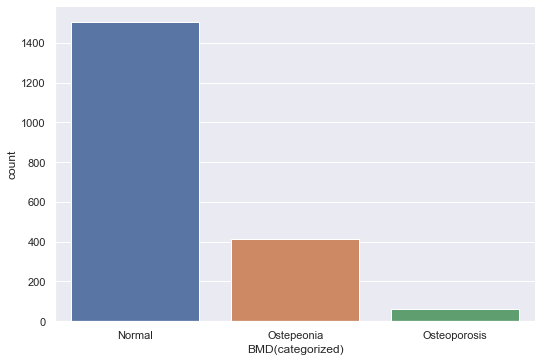

In [317]:
sns.catplot(data=df, x="BMD(categorized)", kind="count", height=5, aspect=1.5)

## *Bivariate Analysis*

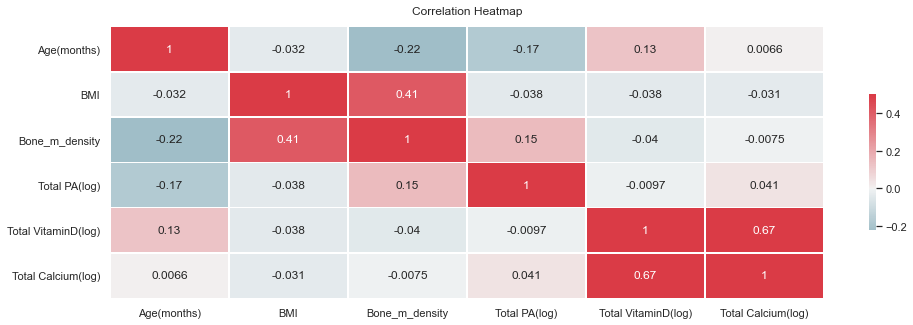

In [318]:
df_corr = df.drop(columns=["Id", "Total measure of PA", "Total Calcium ", "Total VitaminD"])

corr=df_corr.corr()

f, ax = plt.subplots(figsize=(16, 5))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
heatmap = sns.heatmap(corr, cmap=cmap, vmax=.5, center=0, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

## *Total vitaminD and Total calcium seems to be highly associated. will need to address to prevent multicollinearity*

In [319]:
#Bone mineral density and gender
# conduct f test to determine if variances are equal
def f_test(first_group, second_group):
    f_value = np.var(first_group, ddof=1)/np.var(second_group, ddof=1)
    dfn = first_group.size - 1
    dfd = second_group.size - 1
    p_value = 1 - stats.f.cdf(f_value, dfn, dfd)
    return f_value, p_value
f_test(df["Bone_m_density"][df["Sex"]=="Male"], df["Bone_m_density"][df["Sex"]=="Female"])
#stats.ttest_ind(

(0.9776075951366399, 0.6392917937766562)

## *From our results we see that the pvalue is >0.05, so we do not reject the null hypothesis and conclude they have equal variance*

In [320]:
#perform t-test using equal variance
stats.ttest_ind(df["Bone_m_density"][df["Sex"]=="Male"], df["Bone_m_density"][df["Sex"]=="Female"], equal_var=True)

Ttest_indResult(statistic=18.674059544397732, pvalue=8.417238534237996e-72)

In [321]:
#Bone mineral density and ethnicity
stats.f_oneway(df["Bone_m_density"][df["Ethnicity"]=="Mex american"], df["Bone_m_density"][df["Ethnicity"]=="Other hispanic"], df["Bone_m_density"][df["Ethnicity"]=="Euro-American"], df["Bone_m_density"][df["Ethnicity"]=="Afro-American"], df["Bone_m_density"][df["Ethnicity"]=="Other"])


F_onewayResult(statistic=19.461384874062002, pvalue=1.0132193546839078e-15)

In [322]:
#Bone mineral  density and smoker
stats.f_oneway(df["Bone_m_density"][df["smoker"]=="Never smoked"], df["Bone_m_density"][df["smoker"]=="Past smoker"], df["Bone_m_density"][df["smoker"]=="current smoker"])

F_onewayResult(statistic=11.932620821210888, pvalue=7.059492534729537e-06)

In [323]:

#drop bmd c.ategorized and pa level categorized to avoid multicollinearity. Also drop vitamin d as calcium is a better predictor and both are strongly associated.

df.drop(columns=["PA Level (categorized)", "BMD(categorized)", "Total VitaminD(log)", "Total VitaminD", "Total Calcium ", "Total measure of PA", "Id"], inplace=True)

# df.drop(columns=["Calcium(dietary)", "Calcium (supplement)", "Vitamin D(dietary)", "Vitamin D(supplement)"], inplace=True)

In [324]:
df

,Sex,Age(months),Ethnicity,BMI,smoker,Bone_m_density,Total PA(log),Total Calcium(log)
2,Male,629.0,Mex american,27.56,Never smoked,0.907,8.699515,6.645091
3,Male,778.0,Mex american,33.64,Past smoker,0.972,5.886104,7.017506
8,Male,866.0,Euro-American,29.02,Never smoked,0.946,6.396930,7.135687
9,Female,934.0,Euro-American,19.96,current smoker,0.884,5.634790,6.955593
10,Male,480.0,Mex american,25.46,current smoker,1.062,10.105612,6.744059
...,...,...,...,...,...,...,...,...
3576,Female,669.0,Euro-American,25.81,current smoker,0.956,7.090077,7.074540
3577,Male,685.0,Euro-American,22.63,Past smoker,0.897,9.431883,6.023448
3580,Female,862.0,Other hispanic,30.97,Never smoked,0.902,7.138867,7.151094
3582,Male,739.0,Mex american,30.08,current smoker,0.915,9.574983,7.225481


In [325]:
# Create dummy variables for categorical data and seperate dataset into features and target variable.
df = pd.get_dummies(df)
df.drop(['Sex_Female', "Ethnicity_Euro-American", "smoker_Never smoked"], inplace=True, axis=1)

In [326]:
df

,Age(months),BMI,Bone_m_density,Total PA(log),Total Calcium(log),Sex_Male,Ethnicity_Afro-American,Ethnicity_Mex american,Ethnicity_Other,Ethnicity_Other hispanic,smoker_Past smoker,smoker_current smoker
2,629.0,27.56,0.907,8.699515,6.645091,1,0,1,0,0,0,0
3,778.0,33.64,0.972,5.886104,7.017506,1,0,1,0,0,1,0
8,866.0,29.02,0.946,6.396930,7.135687,1,0,0,0,0,0,0
9,934.0,19.96,0.884,5.634790,6.955593,0,0,0,0,0,0,1
10,480.0,25.46,1.062,10.105612,6.744059,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3576,669.0,25.81,0.956,7.090077,7.074540,0,0,0,0,0,0,1
3577,685.0,22.63,0.897,9.431883,6.023448,1,0,0,0,0,1,0
3580,862.0,30.97,0.902,7.138867,7.151094,0,0,0,0,1,0,0
3582,739.0,30.08,0.915,9.574983,7.225481,1,0,1,0,0,0,1


In [327]:
#Seperate dataset into features and target variable.
x = df.iloc[:,[0,1,3,4,5,6,7,8,9,10,11]]
y = df.iloc[:,2]
x.reset_index(inplace=True, drop=True)
y.reset_index(inplace=True, drop=True)
x

,Age(months),BMI,Total PA(log),Total Calcium(log),Sex_Male,Ethnicity_Afro-American,Ethnicity_Mex american,Ethnicity_Other,Ethnicity_Other hispanic,smoker_Past smoker,smoker_current smoker
0,629.0,27.56,8.699515,6.645091,1,0,1,0,0,0,0
1,778.0,33.64,5.886104,7.017506,1,0,1,0,0,1,0
2,866.0,29.02,6.396930,7.135687,1,0,0,0,0,0,0
3,934.0,19.96,5.634790,6.955593,0,0,0,0,0,0,1
4,480.0,25.46,10.105612,6.744059,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1974,669.0,25.81,7.090077,7.074540,0,0,0,0,0,0,1
1975,685.0,22.63,9.431883,6.023448,1,0,0,0,0,1,0
1976,862.0,30.97,7.138867,7.151094,0,0,0,0,1,0,0
1977,739.0,30.08,9.574983,7.225481,1,0,1,0,0,0,1


In [328]:
#Implement Gradient Descent:
#First compute cost

def compute_cost(X, y, w, b):
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter

    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0
    for i in range(m):
        predicted_y = np.dot(X.iloc[i], w) + b
        cost = cost + (predicted_y - y[i])**2
    cost = cost / (2 * m)
    return cost

In [339]:
# compute gradient
def compute_gradient(X, y, w, b):
    """
   Computes the gradient for linear regression
   Args:
     X (ndarray (m,n)): Data, m examples with n features
     y (ndarray (m,)) : target values
     w (ndarray (n,)) : model parameters
     b (scalar)       : model parameter

   Returns:
     dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w.
     dj_db (scalar):       The gradient of the cost w.r.t. the parameter b.
   """
    m,n = X.shape
    dj_dw = np.zeros((n,), dtype=object)
    dj_db = 0

    for i in range(m):
        error = (np.dot(X.iloc[i], w) + b) - y.iloc[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + error * X.iloc[i, j]
        dj_db = dj_db + error

    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw

In [340]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618, 5.98, 6.78, 7.88, 6.00, 5.00, 3.45, 13.45])
tmp_dj_db, tmp_dj_dw = compute_gradient(x, y, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: 1013.351986760014
dj_dw at initial w,b: 
 [708728.2793097546 29363.249755141915 7567.943734062231 6903.9541604208
 543.9767446141382 181.58075496384134 149.6877670156306 36.80698769608271
 113.00249713673836 331.1097127646823 186.76792785117732]


In [341]:
#implement gradient descent
def gradient_descent(X, y, w_in, b_in, gradient_function, a, iteration):
    #save cost j and w at each iteration
    j_history = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(iteration):
        # calculate gradient
        dj_db, dj_dw = gradient_function(X, y, w, b)

        #update parameters
        w = w - a * dj_dw
        b = b - a * dj_dw

        # if i<100000:
        #     j_history.append(cost_function(X, y, w, b))
        #
        # if i% math.ceil(iterations / 10) == 0:
        #     print(f"Iteration {i}: Cost {j_history[-1]}")

    return w, b, j_history

In [342]:
#initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0

iterations = 3
alpha = 5.0e-7

w_final, b_final, J_hist = gradient_descent(x, y, initial_w, initial_b, compute_gradient, alpha, iterations)

In [ ]:
print(w_final, b_final)